In [1]:
%matplotlib inline


# Extrema


We detect local maxima in a galaxy image. The image is corrupted by noise,
generating many local maxima. To keep only those maxima with sufficient
local contrast, we use h-maxima.



In [2]:
import numpy as np

import matplotlib.pyplot as plt

from skimage.measure import label
from skimage import data
from skimage import color
from skimage.morphology import extrema
from skimage import exposure
from scipy.io import loadmat

y_pred = loadmat('2'+'glass')['Z'][:,0]

img = np.reshape(y_pred, (20,68), order="F")

# the rescaling is done only for visualization purpose.
# the algorithms would work identically in an unscaled version of the
# image. However, the parameter h needs to be adapted to the scale.
img = exposure.rescale_intensity(img)

# We find all local maxima
local_maxima = extrema.local_maxima(img)
label_maxima = label(local_maxima)
overlay = color.label2rgb(label_maxima, img, alpha=0.7, bg_label=0,
                          bg_color=None, colors=[(1, 0, 0)])

# We observed in the previous image, that there are many local maxima
# that are caused by the noise in the image.
# For this, we find all local maxima with a height of h.
# This height is the gray level value by which we need to descent
# in order to reach a higher maximum and it can be seen as a local
# contrast measurement.
# The value of h scales with the dynamic range of the image, i.e.
# if we multiply the image with a constant, we need to multiply
# the value of h with the same constant in order to achieve the same result.
h = 0.2
h_maxima = extrema.h_maxima(img, h)
label_h_maxima = label(h_maxima)
overlay_h = color.label2rgb(label_h_maxima, img, alpha=0.7, bg_label=0,
                            bg_color=None, colors=[(1, 0, 0)])

# GRAPHICAL OUTPUT



# a new figure with 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(img, cmap='gray', interpolation='none')
ax[0].set_title('Original image')
ax[0].axis('off')

ax[1].imshow(overlay, interpolation='none')
ax[1].set_title('Local Maxima')
ax[1].axis('off')

ax[2].imshow(overlay_h, interpolation='none')
ax[2].set_title('h maxima for h = %.2f' % h)
ax[2].axis('off')

plt.savefig('SPIKES.png')

ImportError: cannot import name 'extrema'

In [95]:
# We find all local maxima

img = np.invert(img)
local_maxima = extrema.local_maxima(img)
label_maxima = label(local_maxima)
overlay = color.label2rgb(label_maxima, img, alpha=0.7, bg_label=0,
                          bg_color=None, colors=[(1, 0, 0)])

# We observed in the previous image, that there are many local maxima
# that are caused by the noise in the image.
# For this, we find all local maxima with a height of h.
# This height is the gray level value by which we need to descent
# in order to reach a higher maximum and it can be seen as a local
# contrast measurement.
# The value of h scales with the dynamic range of the image, i.e.
# if we multiply the image with a constant, we need to multiply
# the value of h with the same constant in order to achieve the same result.
h = 0.2
h_maxima = extrema.h_maxima(img, h)
label_h_maxima = label(h_maxima)
overlay_h = color.label2rgb(label_h_maxima, img, alpha=0.7, bg_label=0,
                            bg_color=None, colors=[(1, 0, 0)])

# GRAPHICAL OUTPUT



# a new figure with 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(img, cmap='gray', interpolation='none')
ax[0].set_title('Original image')
ax[0].axis('off')

ax[1].imshow(overlay, interpolation='none')
ax[1].set_title('Local Maxima')
ax[1].axis('off')

ax[2].imshow(overlay_h, interpolation='none')
ax[2].set_title('h maxima for h = %.2f' % h)
ax[2].axis('off')
plt.show()

NameError: name 'extrema' is not defined

Feature Extraction

In [78]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
from scipy.io import loadmat
from sklearn.decomposition import FastICA, PCA
from sklearn.manifold import TSNE

import numpy as np

In [23]:
model = ResNet50(weights='imagenet', include_top=False)

/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/keras_applications/resnet50.py:263: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 27s 0us/step


In [91]:
dataset = 'steel'

# Load the matlab array and reshape to the right size
X = loadmat('all'+dataset)['Z'][:,1:4]
X = PCA(n_components=3).fit_transform(X)  
X = np.reshape(X, (20,68,3), order="F")

im_1 = image.array_to_img(X)
image.save_img('elephant2.jpg',im_1)

img_path = 'elephant2.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
features_arr = np.char.mod('%f', features)


plotting_vecs = FastICA(n_components=2).fit_transform(features_arr.reshape([2048,7*7]))  

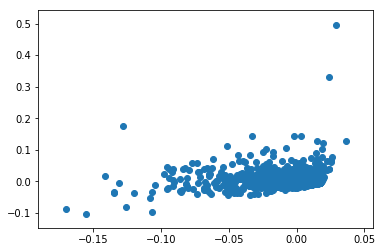

In [92]:
plt.scatter(plotting_vecs[:,0],plotting_vecs[:,1])

In [93]:
import sklearn.manifold.t_sne.


SyntaxError: invalid syntax (<ipython-input-93-c59b21cdfaaf>, line 1)

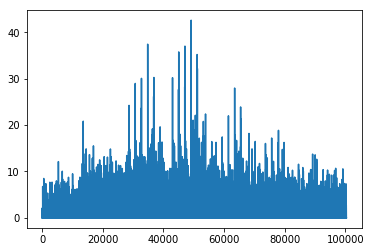

In [37]:
features_arr.shape()

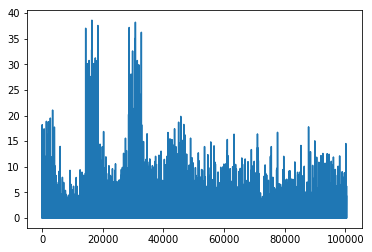

In [35]:
plot(features.flatten())

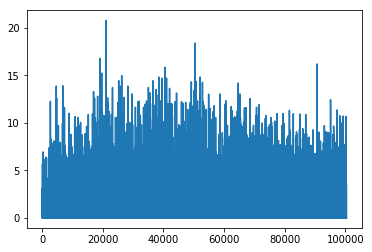

In [33]:
plot(features.flatten())

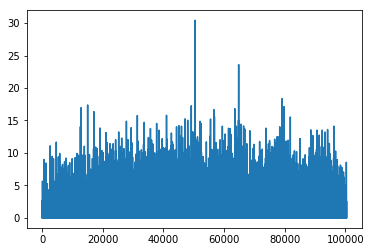

In [31]:
plot(features.flatten())

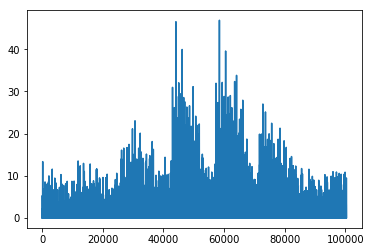

In [29]:
plot(features.flatten())

In [16]:
keras.applications.resnet50.ResNet50

In [4]:
import google.protobuf

In [5]:
google.protobuf?

Type:        module
String form: <module 'google.protobuf' from '/home/jerichooconnell/anaconda3/lib/python3.5/site-packages/google/protobuf/__init__.py'>
File:        ~/anaconda3/lib/python3.5/site-packages/google/protobuf/__init__.py
Docstring:   <no docstring>


In [4]:
!pip3 freeze

absl-py==0.6.1
alabaster==0.7.7
anaconda-client==1.4.0
anaconda-navigator==1.1.0
argcomplete==1.0.0
astor==0.7.1
astroid==2.0.4
astropy==1.1.2
autopep8==1.4.3
Babel==2.2.0
backcall==0.1.0
beautifulsoup4==4.4.1
bitarray==0.8.1
blaze==0.9.1
bokeh==0.11.1
boto==2.39.0
Bottleneck==1.0.0
certifi==2018.8.24
cffi==1.11.5
chest==0.2.3
cloudpickle==0.1.1
clyent==1.2.1
colorama==0.3.7
conda==4.5.11
conda-build==1.20.0
conda-manager==0.3.1
configobj==5.0.6
cryptography==1.4
cycler==0.10.0
Cython==0.23.4
cytoolz==0.9.0.1
dask==0.8.1
datashape==0.5.1
decorator==4.0.9
dill==0.2.4
docutils==0.12
dynd==0.7.3.dev1
entrypoints==0.2.3
eofs==1.3.1
et-xmlfile==1.0.1
fastcache==1.0.2
Flask==0.10.1
Flask-Cors==2.1.2
future==0.17.1
gast==0.2.0
gevent==1.1.0
greenlet==0.4.9
grpcio==1.17.1
h5py==2.5.0
hdbscan==0.8.18
HeapDict==1.0.0
idna==2.0
ipdb==0.11
ipykernel==4.10.0
ipython==6.5.0
ipython-genutils==0.1.0
ipywidgets==4.1.1
isort==4.3.4
itsdangerous==0.24
jdcal==1.2
jedi==0.13.1
Jinja2==2.8
jsonschema==2.4.0